<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming For Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 2.0 - Exploratory data analysis
</div>

## Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Exploring data

### Read cleaned data from file

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [2]:
cleaned_df = pd.read_csv('../data/processed/IMDbMovies_processed.csv')

In [3]:
# TEST
cleaned_df.head()

,Title,Summary,Director,Writer,Main Genres,Motion Picture Rating,Runtime (Minutes),Release Year,Rating (Out of 10),Number of Ratings (in thousands),Budget (in milions),Gross in US & Canada (in milions),Gross worldwide (in milions),Opening Weekend Gross in US & Canada (in milions)
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,158.0,2023.0,6.7,38.0,67.8,37.514498,84.968381,20.638887
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,157.0,2023.0,7.2,37.0,100.0,105.043414,191.729235,44.607143
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,118.0,2023.0,6.8,117.0,67.8,46.800000,0.421332,12.500000
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,102.0,2023.0,7.0,10.0,67.8,46.800000,87.100000,12.500000
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,106.0,2023.0,7.0,9.1,67.8,25.408677,29.666585,10.306272


In [4]:
# TEST
cleaned_df.shape

(9083, 14)

## Question 1: What movie genres work well together?

### Step 0: Purpose
- Help production knows which movie genres can be easily combined, thereby increasing the company's profits based on popular genres that audiences often choose to watch.

### Step 1: Analyzing
- We will consider the `Name` and `Genre` columns. We create a matrix with row and column labels are `genres`. We then count the number of common occurrences of each pair of categories and save them in matrix. Finally, we visualize by drawing a heatmap with the lower half of the matrix.

In [5]:
# preprocessing
fixed_df = cleaned_df[['Title', 'Main Genres']].reset_index(drop = True)
fixed_df['Main Genres'] = fixed_df['Main Genres'].str.split(',')
fixed_df = fixed_df.explode('Main Genres')
fixed_df = fixed_df.query("`Main Genres` == `Main Genres`")

In [6]:
combination_df = pd.DataFrame(index = fixed_df['Main Genres'].unique(), columns = fixed_df['Main Genres'].unique())

# assign the count of combination
for i in range(len(fixed_df['Main Genres'].unique()) - 1):
    for j in range(i + 1, len(fixed_df['Main Genres'].unique())):
        temp = fixed_df[(fixed_df['Main Genres'] == fixed_df['Main Genres'].unique()[i]) | 
                        (fixed_df['Main Genres'] == fixed_df['Main Genres'].unique()[j])].index
        combination_df.at[fixed_df['Main Genres'].unique()[i], fixed_df['Main Genres'].unique()[j]] = temp.shape[0] - temp.nunique() if temp.shape[0] - temp.nunique() else 0
combination_df = combination_df.T.fillna(0)
combination_df

,Action,Adventure,Biography,Drama,Crime,Animation,Comedy,Family,Horror,Mystery,...,Fantasy,Sci-Fi,Romance,Music,Sport,Musical,Documentary,War,Western,Film-Noir
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,875,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,50,41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drama,661,395,536,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Crime,618,71,120,934,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animation,108,336,4,65,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,441,604,66,1052,364,233,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Family,39,209,13,156,7,45,291,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Horror,157,63,4,322,67,3,195,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Mystery,84,35,3,484,245,2,73,1,367,0,...,0,0,0,0,0,0,0,0,0,0


### Step 2: Visualization

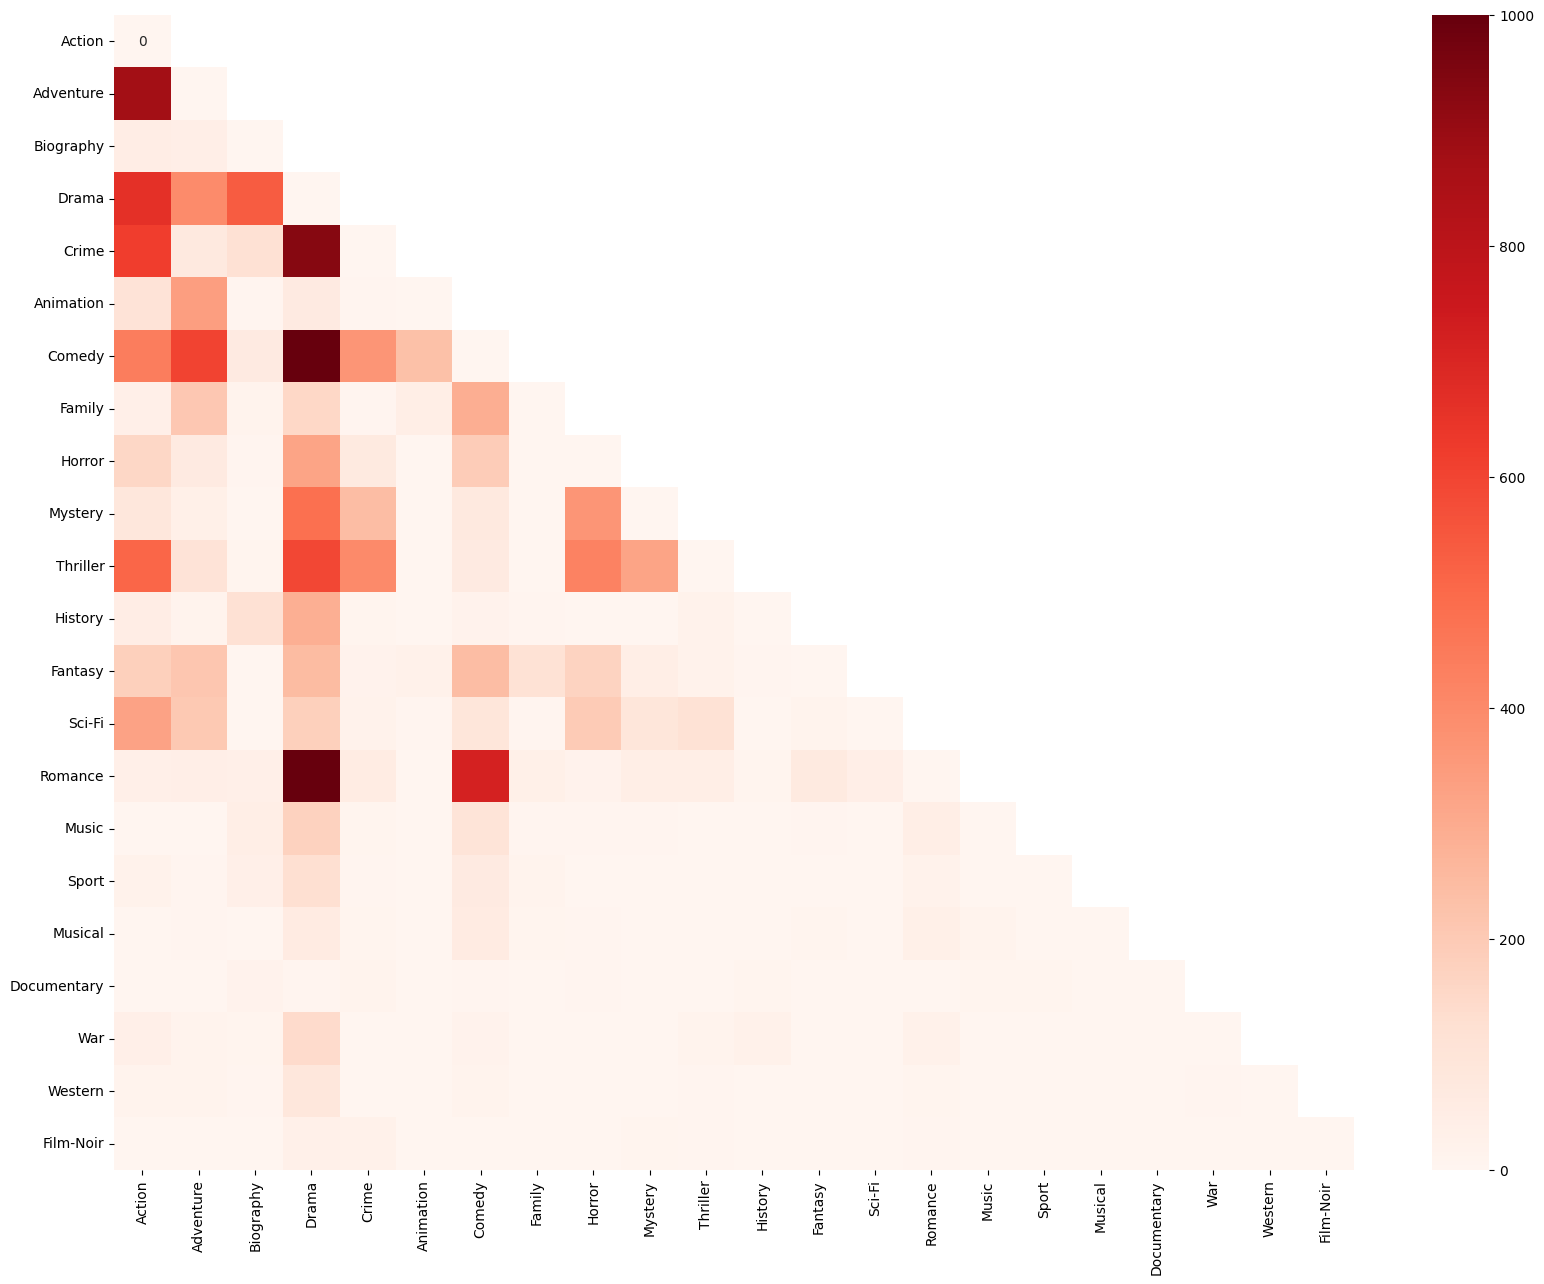

In [7]:
plt.figure(figsize = (20, 15))
mask = np.triu(np.ones_like(combination_df), k = 1)
sns.heatmap(combination_df, annot = True, fmt = 'd', cmap = 'Reds', mask = mask, vmin = 0, vmax = 1000)
plt.show()

### Step 3: Give Observation
- According to the heatmap, we can see some pairs of genres have combined regularly:
    - `Action` and `Adventure`.
    - `Drama` and `Romance`.
    - `Drama` and `Comedy`.
    - `Drama` and `Crime`.
- That's understandable because their nature is the same. One side is a movie genre that brings dramatic suspense, the other side brings laughter or a feeling of relaxation.
- In conclusion, we recommend that filmmakers should make genre combination as below:
    - `Action` and `Adventure`.
    - `Drama`, `Romance` and `Comedy`.
    - `Drama` and `Crime`.

## Question 2: Does a movie with high scores tend to have high gross?

### Step 0: Purpose
- Consider the impact of ratings on movie gross.
- Determine the impact of scores on gross so filmmakers know the important factors that help them increase gross.

### Step 1: Analyzing

In [8]:
#Filter out columns 'Title', 'Rating (Out of 10)' and 'Gross worldwide (in milions)'
df = cleaned_df[['Title', 'Rating (Out of 10)', 'Gross worldwide (in milions)']]
df

,Title,Rating (Out of 10),Gross worldwide (in milions)
0,Napoleon,6.7,84.968381
1,The Hunger Games: The Ballad of Songbirds & Sn...,7.2,191.729235
2,The Killer,6.8,0.421332
3,Leo,7.0,87.100000
4,Thanksgiving,7.0,29.666585
...,...,...,...
9078,Over the Moon,6.3,87.100000
9079,Young Adam,6.4,2.561820
9080,The Greatest Show on Earth,6.5,36.000000
9081,Deep Water,6.5,87.100000


### Step 2: Visualization

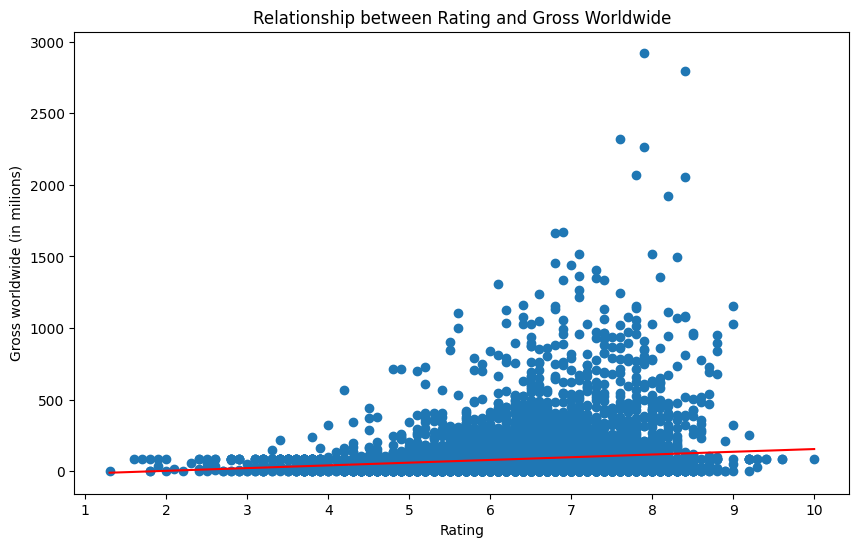

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating (Out of 10)'], df['Gross worldwide (in milions)'])

coefs = np.polyfit(df['Rating (Out of 10)'], df['Gross worldwide (in milions)'], 1)
line = np.poly1d(coefs)
x = np.linspace(df['Rating (Out of 10)'].min(), df['Rating (Out of 10)'].max())
plt.plot(x, line(x), color='red')

plt.xlabel('Rating')
plt.xticks(range(int(df['Rating (Out of 10)'].min()), int(df['Rating (Out of 10)'].max()) + 1))
plt.ylabel('Gross worldwide (in milions)')
plt.title('Relationship between Rating and Gross Worldwide')

plt.show()

### Step 3: Give observations

- Based on the scatter plot, the upward regression line shows a positive relationship between score and revenue.
- However, the regression line points only slightly upward and the scatter points are concentrated toward the bottom of the chart.
- 
We see that the highest grosses of movie are up to 3000 million dollars. However, only a few movies with high ratings have high grosses. There are many movies with grosses under 1000 million dollars and ratings from 5 to 9, most of them under 500 milion doll..
- 
Scores are not an important factor affecting movie gross because movies with ratings as high as 9 also have grosses mostly under 1000 million dollars but movies with ratings around 5 also have similar grosses.

## Question 3: Determine the ideal runtime for a movie

### Step 0: Purpose
- Based on good quality movies to determine the ideal runtime for a movie.

### Step 1: Analyzing

In [10]:
#Filter out columns 'Title', 'Runtime (Minutes)', 'Rating (Out of 10)' and 'Gross worldwide (in milions)'
df = cleaned_df[['Title', 'Runtime (Minutes)', 'Rating (Out of 10)', 'Gross worldwide (in milions)']]

#Calculate the 75th percentile of rating and gross
rating_75 = df['Rating (Out of 10)'].quantile(0.75)
gross_75 = df['Gross worldwide (in milions)'].quantile(0.75)

#Filter out good quality movies with their ratings and grosses above the 75th percentile
df = df[(df['Rating (Out of 10)'] >= rating_75) & (df['Gross worldwide (in milions)'] >= gross_75)]
df

,Title,Runtime (Minutes),Rating (Out of 10),Gross worldwide (in milions)
1,The Hunger Games: The Ballad of Songbirds & Sn...,157.0,7.2,191.729235
5,Oppenheimer,180.0,8.5,950.554020
10,Killers of the Flower Moon,206.0,8.0,152.178693
14,The Hunger Games,142.0,7.2,695.220619
31,Mission: Impossible - Dead Reckoning Part One,163.0,7.8,567.535383
...,...,...,...,...
9024,Zoey's Extraordinary Christmas,99.0,7.2,87.100000
9048,The Cloud-Capped Star,126.0,7.8,87.100000
9050,Private Life,123.0,7.2,87.100000
9059,Baahubali 2: The Conclusion,167.0,8.2,254.158390


### Step 2: Visualization

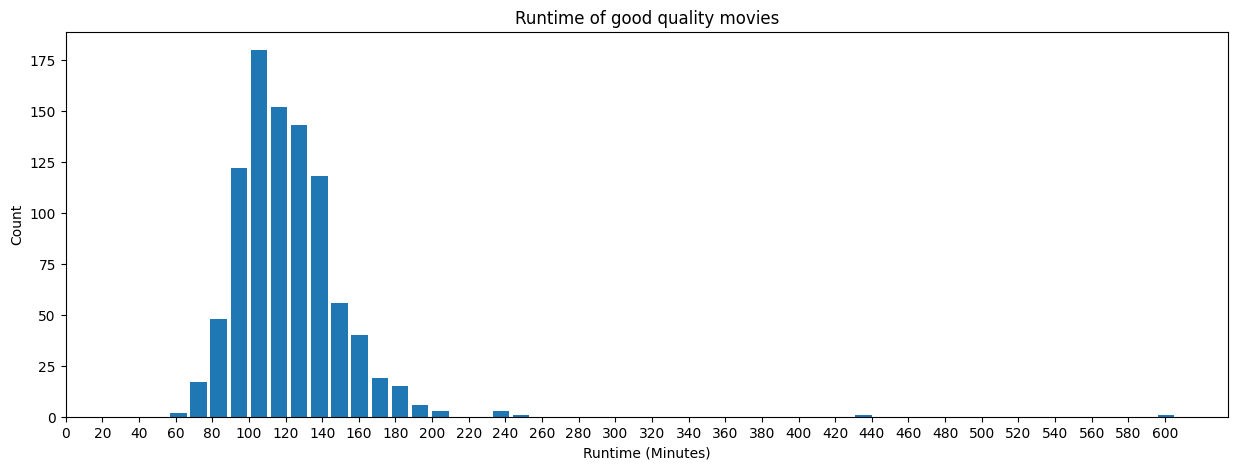

In [11]:
plt.figure(figsize=(15, 5))
plt.hist(df['Runtime (Minutes)'], bins=50, width=9)

plt.xlabel('Runtime (Minutes)')
plt.ylabel('Count')
plt.title('Runtime of good quality movies')
plt.xticks(np.arange(0, int(df['Runtime (Minutes)'].max()), 20))

plt.show()

### Step 3: Give Observation
- Based on the chart, we see that most good movies have a runtime between 90 and 140 minutes.
- Therefore, movie makers should produce films of reasonable runtime to get the best rating and gross.

## Question 4: Movie profit statistics over the years

### Step 0: Purpose
- Statistics on movie profits each year to know the business performance of the movie industry from 1921 to 2020.

### Step 1: Analyzing

In [12]:
#Filter out columns 'Title', 'Release Year', 'Budget (in milions)' and 'Gross worldwide (in milions)'
df = cleaned_df[['Title', 'Release Year', 'Budget (in milions)', 'Gross worldwide (in milions)']]
df = df[(df['Release Year'] >= 1920) & (df['Release Year'] < 2020)]

#Calculate and create column Profit (in milions)
df['Profit (in milions)'] = df['Gross worldwide (in milions)'] - df['Budget (in milions)']

#Split the data into 10-year intervals
df['Decade'] = pd.cut(df['Release Year'], bins=range(1920, 2021, 10), right=False)

#Calculate total & average each decades
profit_df = df.groupby('Decade')['Profit (in milions)'].agg(['mean', 'sum'])
profit_df

,mean,sum
Decade,,
"[1920, 1930)",2.619976,31.439714
"[1930, 1940)",23.458388,1102.544257
"[1940, 1950)",18.390203,1710.288919
"[1950, 1960)",24.674825,4120.695821
"[1960, 1970)",19.009093,4619.209719
"[1970, 1980)",35.710972,15534.272702
"[1980, 1990)",-15.055914,-11984.507188
"[1990, 2000)",40.330260,44726.258499
"[2000, 2010)",51.790398,83123.588234


### Step 2: Visualization

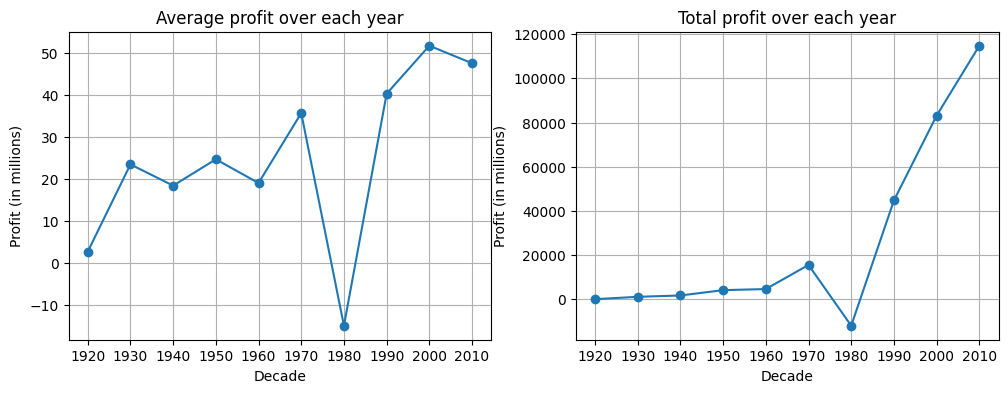

In [13]:
#Convert column "Decade" to a list of integers
decades = [int(i.left) for i in profit_df.index]

plt.figure(figsize=(12, 4))

#Mean profit
plt.subplot(1, 2, 1)
plt.plot(decades, profit_df['mean'], marker='o')

plt.xlabel('Decade')
plt.ylabel('Profit (in millions)')
plt.title('Average profit over each year')

plt.xticks(decades)
plt.grid(True)

#Sum profit
plt.subplot(1, 2, 2)
plt.plot(decades, profit_df['sum'], marker='o')

plt.xlabel('Decade')
plt.ylabel('Profit (in millions)')
plt.title('Total profit over each year')

plt.xticks(decades)
plt.grid(True)

plt.show()

### Step 3: Give observation
- Based on the chart, we see that average profits and total profits tend to increase steadily each year, especially in the 1980s they decreased sharply but then increased again.
- However, the average profit is very small compared to the total profit, which means that the number of movies increased very quickly, especially after the 1980s.
- Since then, we can see that the movie industry is developing very quickly with the number of movies increasing rapidly and stable profits.

## Question 5: Which film genre is most appreciated?

### Step 0: Purpose
- Consider the audience interest in each film genre.
- Helps producers predict audience reception to choose the most suitable script, actors, etc.

### Step 1: Analyzing
- We will consider the Main Genres and Rating (Out of 10) column.
- We create a dictionary with key is the genre and value is a list of this genre's film rating.

In [14]:
fixed_df = cleaned_df[['Title', 'Main Genres', 'Rating (Out of 10)']].reset_index(drop = True)
fixed_df['Main Genres'] = fixed_df['Main Genres'].str.split(',')
genre_dict = {}
for i in range(len(fixed_df['Main Genres'])):
    genres = fixed_df['Main Genres'][i]
    if (type(genres) != list):
        continue
    for genre in genres:
        if genre not in genre_dict:
            genre_dict[genre] = []
        genre_dict[genre].append(fixed_df['Rating (Out of 10)'][i])

### Step 2: Visualization
- After analyzing, we draw the histogram for each genre, show the distribution of rating.

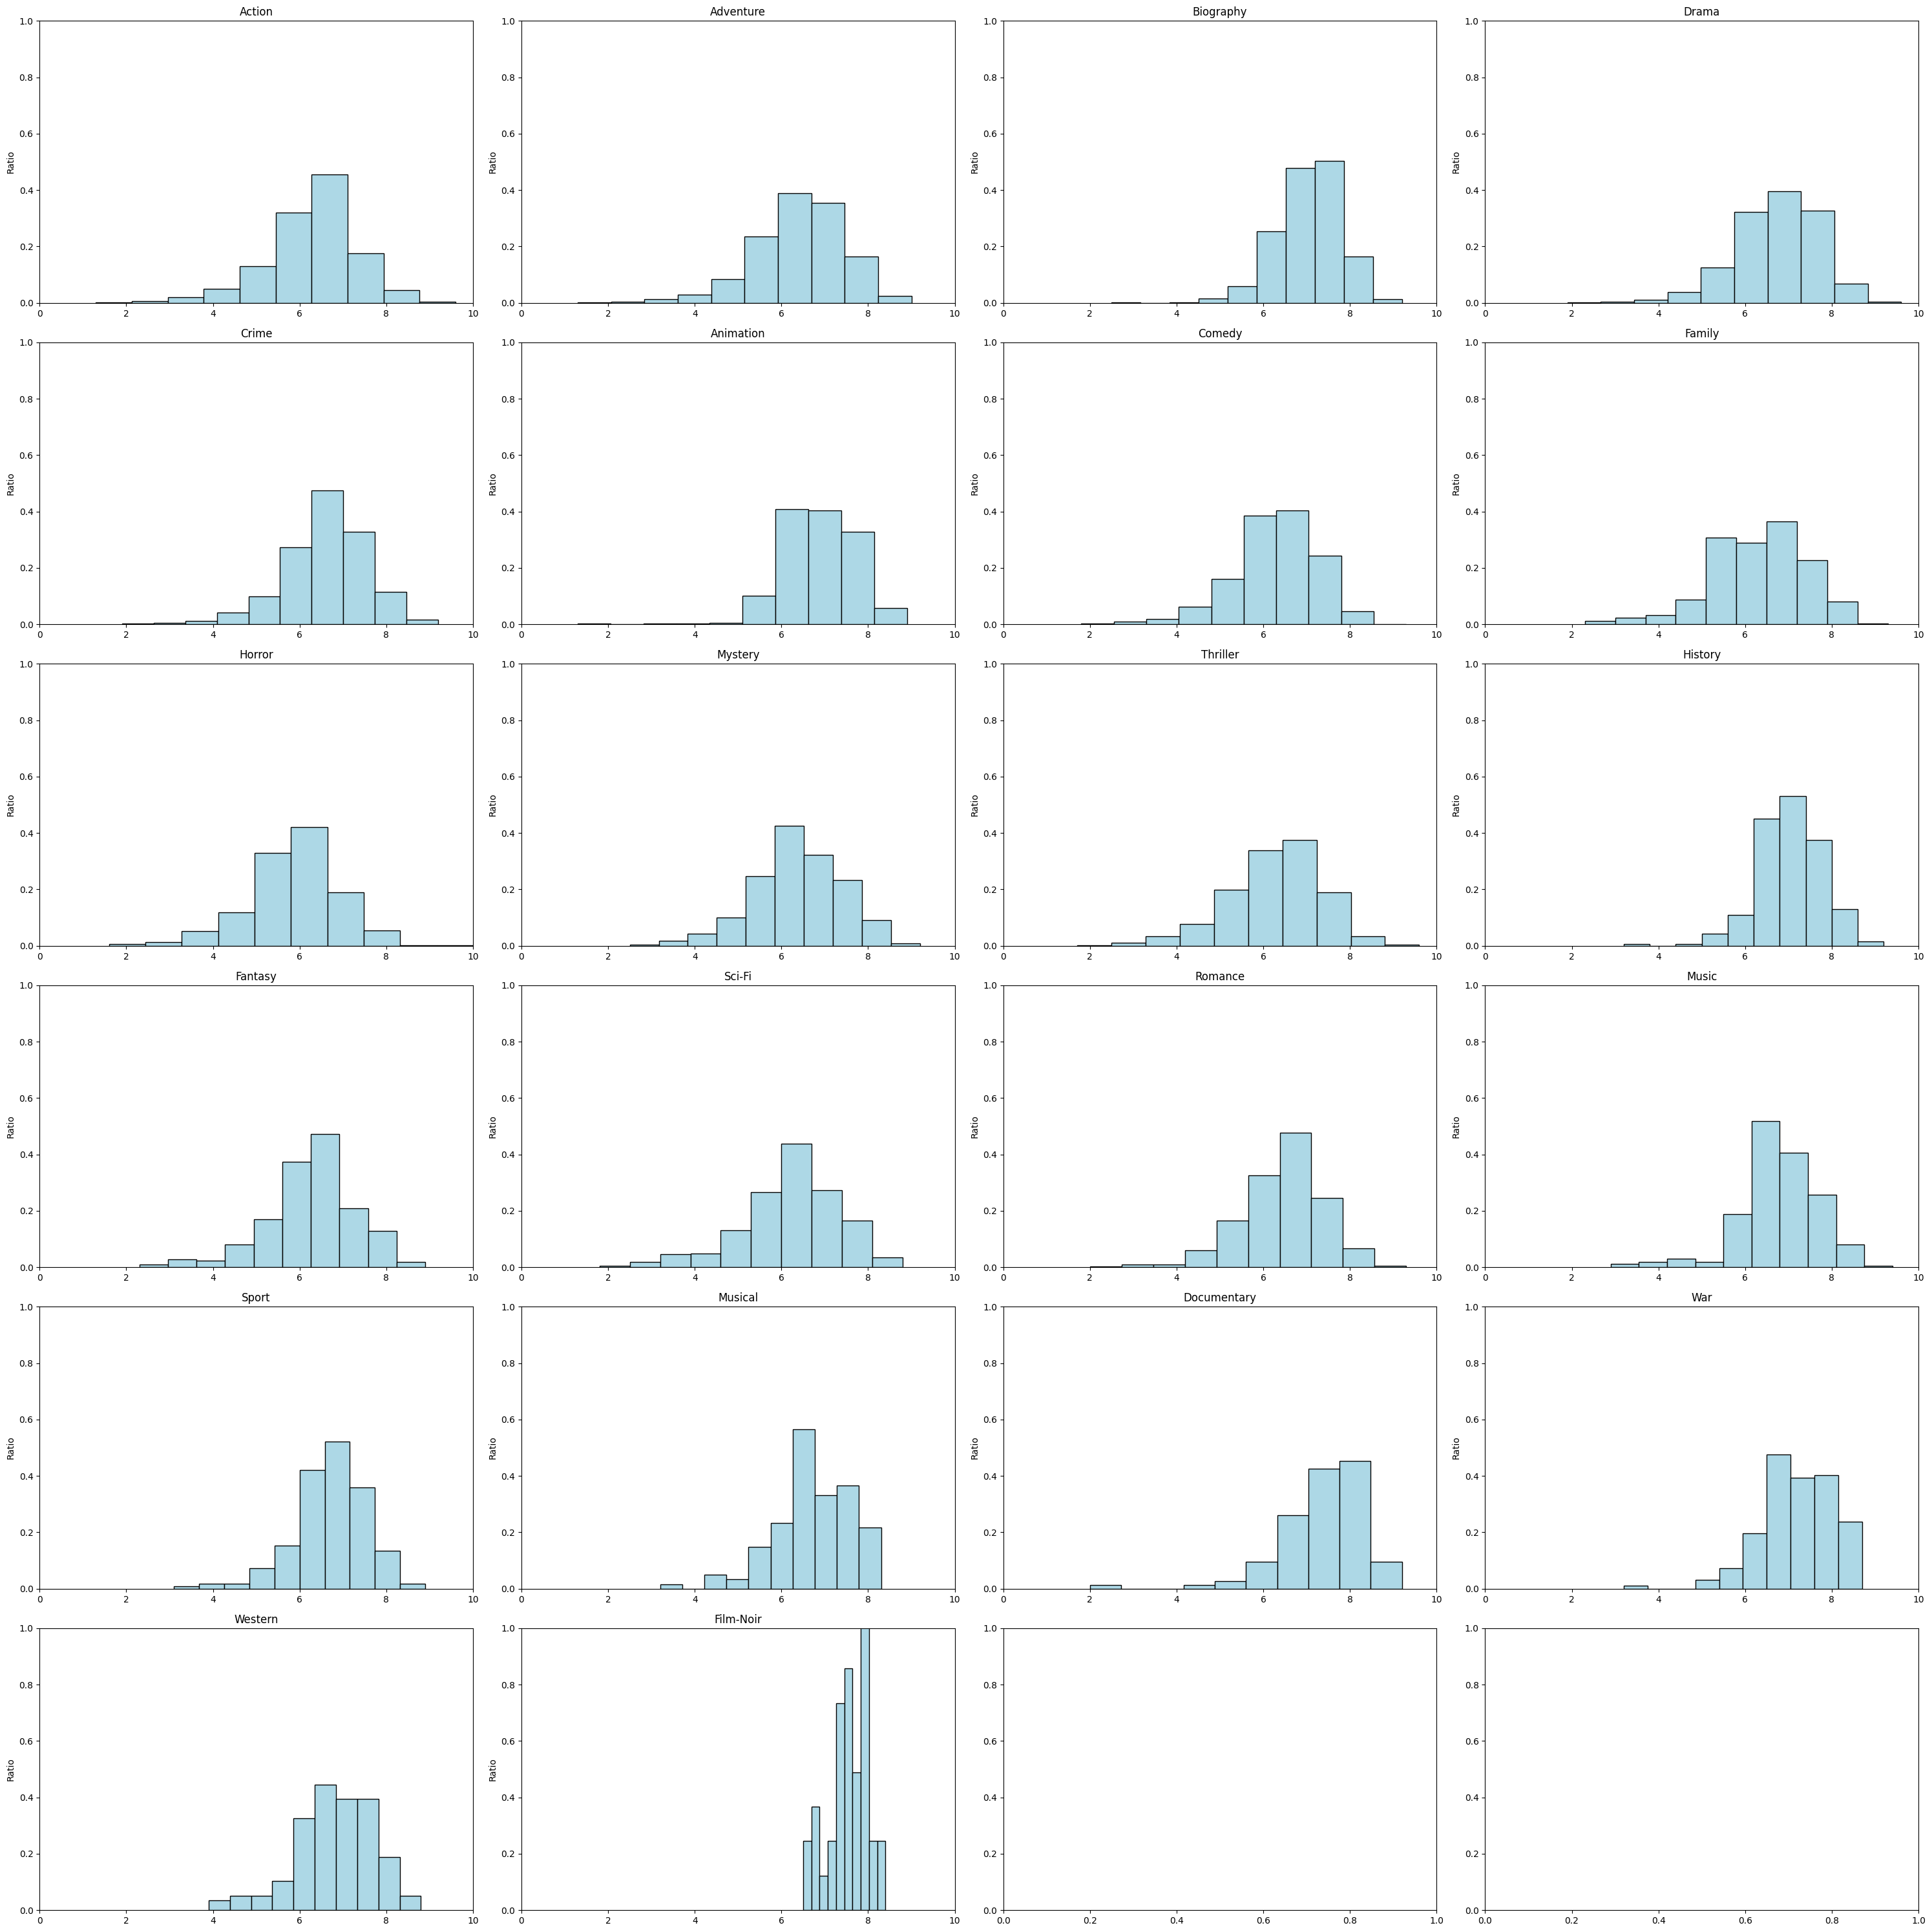

In [15]:
num_rows = 6
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize = (30, 30))

for i, (key, value) in enumerate(genre_dict.items()):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].hist(value, bins = 10, density=True, color = 'lightblue', edgecolor = 'black')
    axes[row_index, col_index].set_title(key)
    axes[row_index, col_index].set_xlim(0, 10)
    axes[row_index, col_index].set_ylim(0, 1)
    axes[row_index, col_index].set_ylabel('Ratio')

plt.tight_layout()
plt.show()

### Step 3: Give observation
- In general, the average rating of genres ranges from 6 to 8.
- Some genres has high above-8-rating is Biography, Crime, History, Documentary.
- Although the number of films in the Film-noir genre is not big, they are highly appreciated.
- Some genres like Action, Adventure, Family, ... the below-5-rating is still high, maybe because these genres are so popular.
\
&rarr; So, we suggest that producers try new genres or refresh old topic to gain the attention from customers.

## Question 6: Does the fact that the writer and director are the same person have a good influence on the film?

### Step 0: Purpose
- Determine if films' ratings are affected by the writers as directors.

### Step 1: Analyzing
- We will consider the `Director`, `Writer` and `Rating (Out of 10)` columns.
- We create two subdataset, one is the rating of films whose the writer is also the director and another one is the rating of films that the writer don't work as a director.

In [33]:
fixed_df = cleaned_df[['Title', 'Director', 'Writer', 'Rating (Out of 10)']].reset_index(drop = True)
fixed_df['Director'] = fixed_df['Director'].str.split(',')
fixed_df['Writer'] = fixed_df['Writer'].str.split(',')

director_writer_duo = pd.DataFrame(columns = ['Title', 'Director - Writer', 'Rating'])
non_director_writer_duo = pd.DataFrame(columns = ['Title', 'Rating'])

for i in range(len(fixed_df['Title'])):
    if (type(fixed_df['Writer'][i]) != list or type(fixed_df['Director'][i]) != list):
        continue
    flag = False
    for director in fixed_df['Director'][i]:
        if director in fixed_df['Writer'][i]:
            flag = True
            break
    if (flag == True):
        entry = {'Title': fixed_df['Title'][i], 'Director - Writer': director, 'Rating': fixed_df['Rating (Out of 10)'][i]}
        new_rows = pd.DataFrame([entry])
        director_writer_duo = pd.concat([new_rows, director_writer_duo]).reset_index(drop = True)
    else:
        entry = {'Title': fixed_df['Title'][i], 'Rating': fixed_df['Rating (Out of 10)'][i]}
        new_rows = pd.DataFrame([entry])
        non_director_writer_duo = pd.concat([new_rows, non_director_writer_duo]).reset_index(drop = True)

In [34]:
director_writer_duo

,Title,Director - Writer,Rating
0,Once Upon a Time in Anatolia,Nuri Bilge Ceylan,7.8
1,Young Adam,David Mackenzie,6.4
2,Sleep,Jason Yu,6.9
3,Downhill,Nat Faxon,4.9
4,Confessions,Tetsuya Nakashima,7.7
...,...,...,...
4135,The Marvels,Nia DaCosta,6.0
4136,Saltburn,Emerald Fennell,7.5
4137,Oppenheimer,Christopher Nolan,8.5
4138,Thanksgiving,Eli Roth,7.0


In [35]:
non_director_writer_duo

,Title,Rating
0,Deep Water,6.5
1,The Greatest Show on Earth,6.5
2,Over the Moon,6.3
3,The Marine,4.7
4,Jessabelle,5.4
...,...,...
4588,Blue Beetle,6.0
4589,Trolls Band Together,6.0
4590,The Killer,6.8
4591,The Hunger Games: The Ballad of Songbirds & Sn...,7.2


### Step 2: Visualization

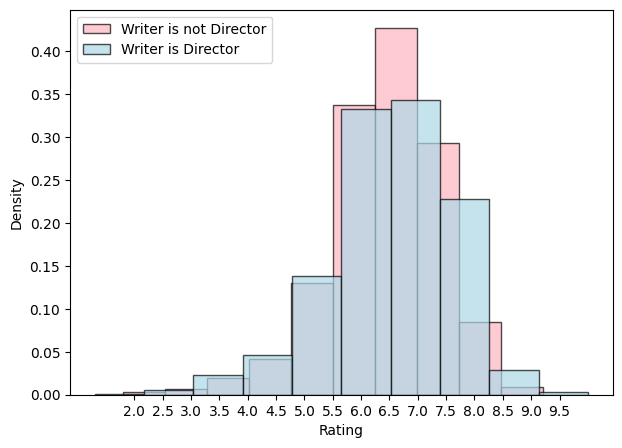

In [36]:
plt.figure(figsize=(7, 5))

plt.hist(non_director_writer_duo['Rating'], bins = 10, density = True, alpha=0.7, color='lightpink', edgecolor='black', label='Writer is not Director')

plt.hist(director_writer_duo['Rating'], bins = 10, density = True, alpha=0.7, color='lightblue', edgecolor='black', label='Writer is Director')

plt.xlabel('Rating')
plt.xticks(np.arange(2, 10, 0.5)) 
plt.ylabel('Density')
plt.legend()

plt.show()

### Step 3: Give observation
- Based on the chart, we see that both two groups of film's ratings concentrate in the similar range, but `writer is director` group has higher range: 5.5 - 7.7 for film that writer isn't the director and 5.6 - 8.3 for the other.
- The high-rated films (above 8.5 - 9) are mainly in `writer is director` group, higher group (rating > 9.2) is all `writer is director` films. We think it's because the writer know clearly and axactly what the film should be, so if they direct the film, it will be good.
- However, in the lower-rating range (under 5.0), there's a lot of films in both group, even more in `writer is director` one. Therefore, it proves that it's not always the writer directs the film would be the good result, maybe it also depends on writer's ability, genre, budget, ...
- In general, it's a good choice for film-maker to have the writer be or support the director, but pay attentions to other factors.